# Data Preprocessing part 2 - Data Analysis
- Provide statistical insight into the data
- Create stepper_diff instead of absolute value of stepper
- Create spectrograms of intensities

In [1]:
import ast
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
data = pd.read_csv('../data/constant_stepper_stg3.csv')

data['Wavelengths'] = data['Wavelengths'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data['Intensities'] = data['Intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data.rename(columns={
    'Time':'time',
    'Intensities': 'intensities',
}, inplace=True)

data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')

data.head()

time  Stage3_OutputPower  Stage3_Piezo  \
0 2024-06-17 10:08:10.347822666            2.082440           0.0   
1 2024-06-17 10:08:10.431182861            2.146321           0.0   
2 2024-06-17 10:08:10.852890968            2.146321           0.0   
3 2024-06-17 10:08:10.929437160            2.215926           0.0   
4 2024-06-17 10:08:10.933794975            2.215926           0.0   

   Stage3_Stepper                                        intensities  \
0       -338208.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
1       -338208.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
2       -337925.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
3       -337925.0  [-2.583013, -5.878997, -7.094142, 9.856287, -0...   
4       -337925.0  [-2.583013, -5.878997, -7.094142, 9.856287, -0...   

                                         Wavelengths  idx  
0  [634.835144, 635.296997, 635.758911, 636.22082...    0  
1  [634.835144, 635.296997, 635.758911, 636.22082...    0  
2  [634.835144, 635.296997, 635.758911, 636.22082...    1  
3  [634.835144, 635.296997, 635.758911, 636.22082...    1  
4  [634.835144, 635.296997, 635.758911, 636.22082...    1

## Conditional vector
### Stepper

In [3]:
# Calculate the difference in Stage3_Stepper values
data['stepper_diff'] = data['Stage3_Stepper'].diff()
data['stepper_diff'].iloc[0] = 0

data.head(10)

/tmp/ipykernel_2680701/343156577.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['stepper_diff'].iloc[0] = 0
/tmp/ipykernel_2680701/343156577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

time  Stage3_OutputPower  Stage3_Piezo  \
0 2024-06-17 10:08:10.347822666            2.082440           0.0   
1 2024-06-17 10:08:10.431182861            2.146321           0.0   
2 2024-06-17 10:08:10.852890968            2.146321           0.0   
3 2024-06-17 10:08:10.929437160            2.215926           0.0   
4 2024-06-17 10:08:10.933794975            2.215926           0.0   
5 2024-06-17 10:08:12.199779034            2.215926           0.0   
6 2024-06-17 10:08:12.446031094            2.177769           0.0   
7 2024-06-17 10:08:12.448709011            2.177769           0.0   
8 2024-06-17 10:08:12.698511124            2.223322           0.0   
9 2024-06-17 10:08:13.202000141            2.163728           0.0   

   Stage3_Stepper                                        intensities  \
0       -338208.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
1       -338208.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
2       -337925.0  [1.416987, -1.878997, -7.094142, 5.856287, -4....   
3       -337925.0  [-2.583013, -5.878997, -7.094142, 9.856287, -0...   
4       -337925.0  [-2.583013, -5.878997, -7.094142, 9.856287, -0...   
5       -337287.0  [2.416987, -1.878997, -1.094142, 7.856287, 0.3...   
6       -337287.0  [2.416987, -1.878997, -1.094142, 7.856287, 0.3...   
7       -337287.0  [2.416987, -1.878997, -1.094142, 7.856287, 0.3...   
8       -337287.0  [2.416987, -1.878997, -1.094142, 7.856287, 0.3...   
9       -337287.0  [4.416987, -1.878997, -2.094142, 7.856287, -2....   

                                         Wavelengths  idx  stepper_diff  
0  [634.835144, 635.296997, 635.758911, 636.22082...    0           0.0  
1  [634.835144, 635.296997, 635.758911, 636.22082...    0           0.0  
2  [634.835144, 635.296997, 635.758911, 636.22082...    1         283.0  
3  [634.835144, 635.296997, 635.758911, 636.22082...    1           0.0  
4  [634.835144, 635.296997, 635.758911, 636.22082...    1           0.0  
5  [634.835144, 635.296997, 635.758911, 636.22082...    2         638.0  
6  [634.835144, 635.296997, 635.758911, 636.22082...    2           0.0  
7  [634.835144, 635.296997, 635.758911, 636.22082...    2           0.0  
8  [634.835144, 635.296997, 635.758911, 636.22082...    2           0.0  
9  [634.835144, 635.296997, 635.758911, 636.22082...    2           0.0

### Statistics

In [4]:
print_feature_statistics(data)


Statistics for Stage3_OutputPower:
  Minimum: 1.68496
  Maximum: 2.26343
  Mean: 1.9270967319377075
  Median: 1.914118
  Variance: 0.0075093785800933194

Statistics for Stage3_Piezo:
  Minimum: -1.614288
  Maximum: 1.054535
  Mean: -0.39387849897881033
  Median: -0.351685
  Variance: 0.30736530398120204

Statistics for Stage3_Stepper:
  Minimum: -338208.0
  Maximum: -302907.0
  Mean: -319752.763466939
  Median: -318127.0
  Variance: 106870061.41239522

Statistics for stepper_diff:
  Minimum: 0.0
  Maximum: 672.0
  Mean: 4.506127138115905
  Median: 0.0
  Variance: 1276.7766410387246


## Intensities
### Statistics

In [5]:
# Flatten the intensities into a single list
all_intensities = np.concatenate(data['intensities'])

# Calculate statistics
min_val = np.min(all_intensities)
max_val = np.max(all_intensities)
mean_val = np.mean(all_intensities)
median_val = np.median(all_intensities)
variance_val = np.var(all_intensities)

# Print statistics
print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: -26.207995
Maximum Intensity: 4192.00796
Mean Intensity: 353.5788310743647
Median Intensity: 6.333447
Variance of Intensities: 399012.83902535564


In [6]:
data.describe()

time  Stage3_OutputPower  Stage3_Piezo  \
count                           7834         7834.000000   7834.000000   
mean   2024-06-17 10:18:22.102510848            1.927097     -0.393878   
min    2024-06-17 10:08:10.347822666            1.684960     -1.614288   
25%    2024-06-17 10:13:35.832232704            1.863999     -0.815552   
50%    2024-06-17 10:18:23.038426880            1.914118     -0.351685   
75%    2024-06-17 10:23:07.504600576            1.975079      0.020722   
max    2024-06-17 10:27:56.776968002            2.263430      1.054535   
std                              NaN            0.086662      0.554441   

       Stage3_Stepper          idx  stepper_diff  
count     7834.000000  7834.000000   7834.000000  
mean   -319752.763467    72.587695      4.506127  
min    -338208.000000     0.000000      0.000000  
25%    -327457.000000    40.000000      0.000000  
50%    -318127.000000    80.000000      0.000000  
75%    -309020.000000   116.000000      0.000000  
max    -302907.000000   142.000000    672.000000  
std      10338.457573    42.400572     35.734292

### Distribution of wavelength intesities

Bin counts:
  <-inf,-20): 3158 values,   <-20,30): 5292695 values,   <30,80): 105801 values,   <80,130): 60370 values,   <130,180): 46796 values,   <180,230): 39381 values,   <230,280): 35297 values,   <280,330): 32391 values,   <330,380): 30470 values,   <380,430): 28992 values,   <430,480): 35963 values,   <480,530): 60299 values,   <530,580): 90884 values,   <580,630): 64204 values,   <630,680): 58728 values,   <680,730): 66236 values,   <730,780): 95906 values,   <780,830): 129200 values,   <830,880): 145973 values,   <880,930): 216986 values,   <930,980): 226795 values,   <980,1030): 203649 values,   <1030,1080): 125762 values,   <1080,1130): 83510 values,   <1130,1180): 57877 values,   <1180,1230): 48084 values,   <1230,1280): 45354 values,   <1280,1330): 42246 values,   <1330,1380): 39173 values,   <1380,1430): 34273 values,   <1430,1480): 27744 values,   <1480,1530): 21950 values,   <1530,1580): 18937 values,   <1580,1630): 20127 values,   <1630,1680): 21821 values,   <1680,173

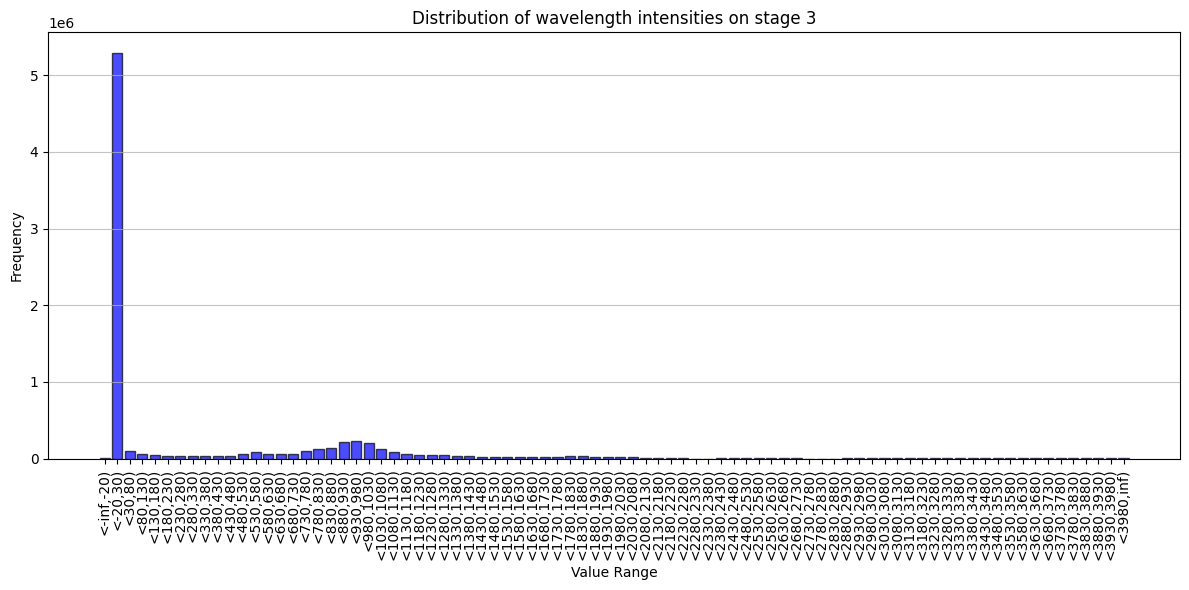

In [7]:
custom_bin_histogram(all_intensities, "Distribution of wavelength intensities on stage 3")

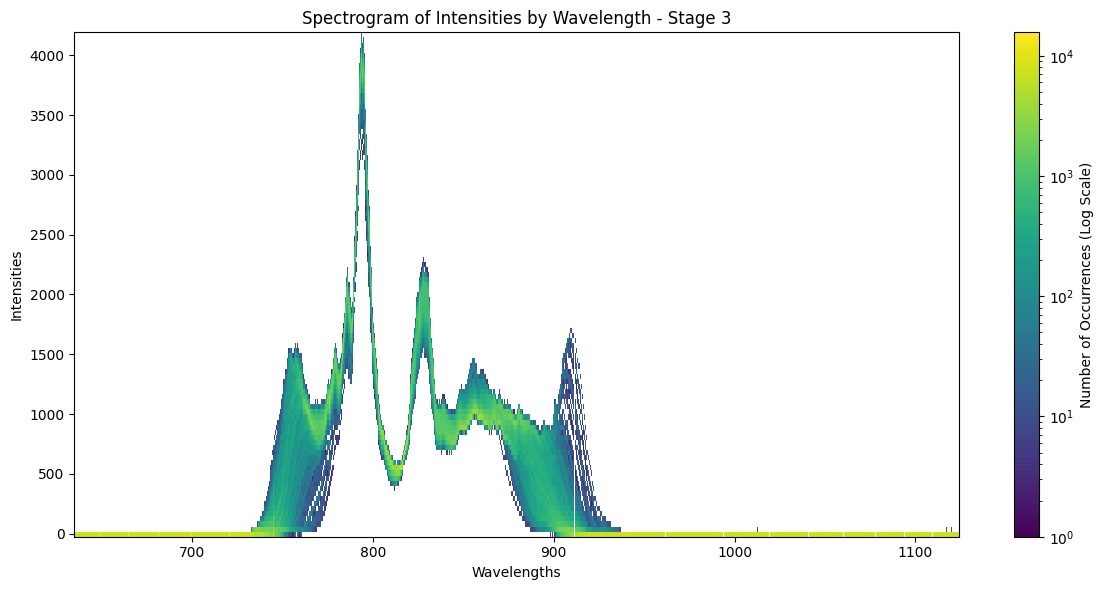

In [8]:
#wavelengths = np.array(eval(data['Wavelengths'].iloc[0]))
wavelengths = data['Wavelengths'].iloc[0]
intensities = data['intensities']

create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength - Stage 3")

## Create 3d spectrograms of intensities

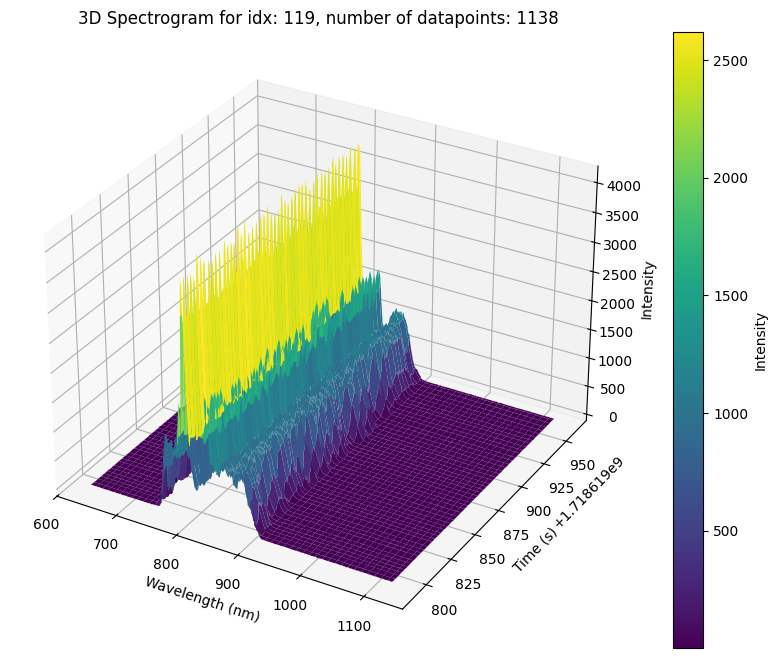

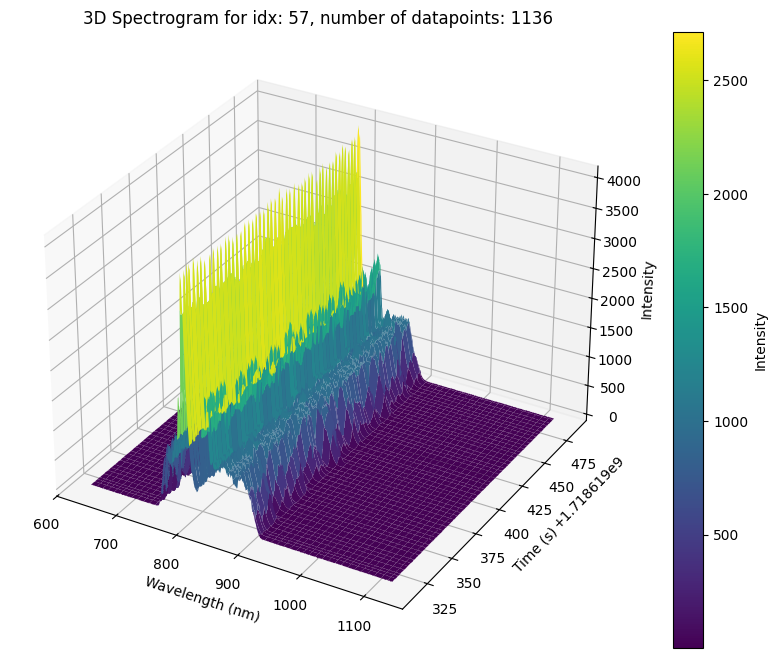

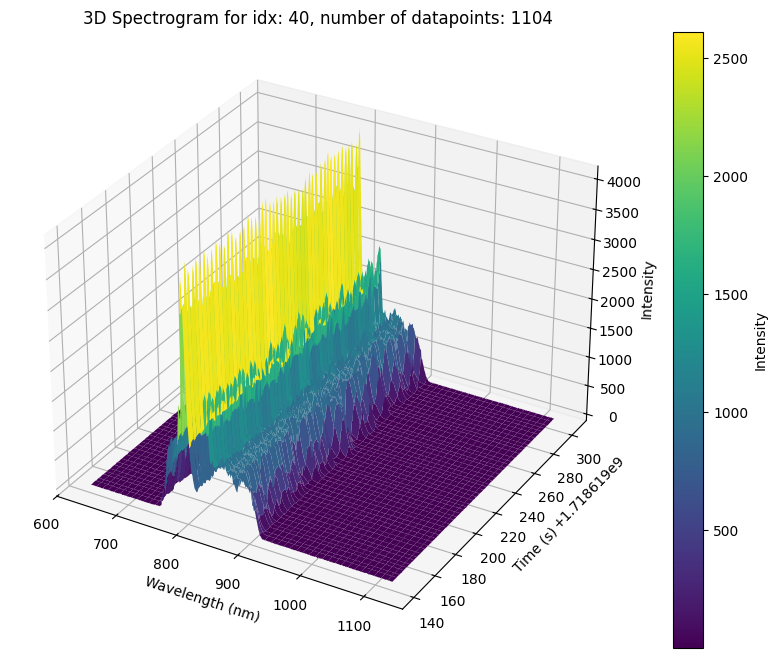

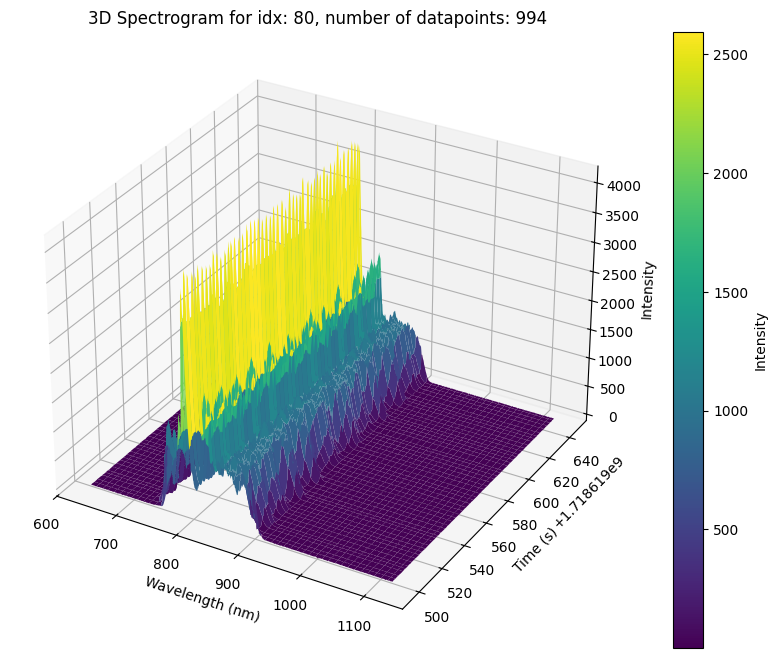

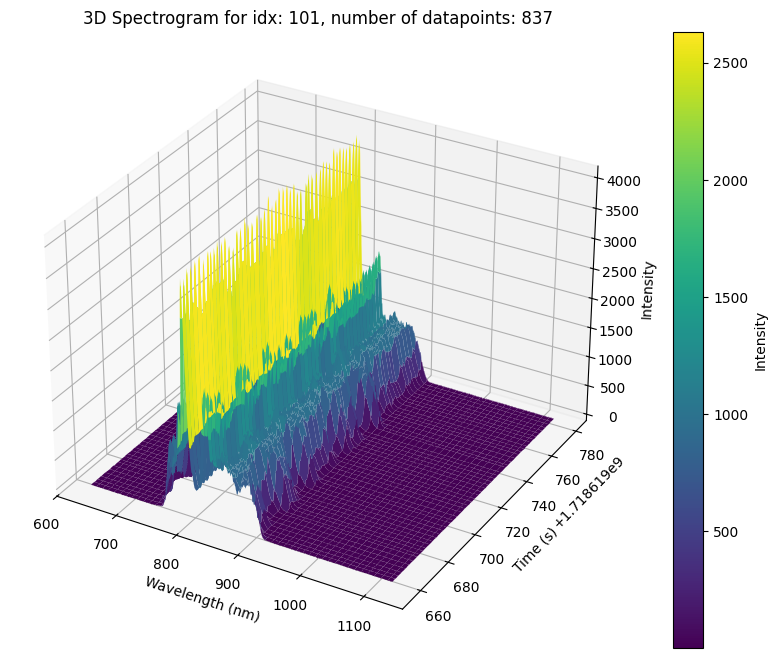

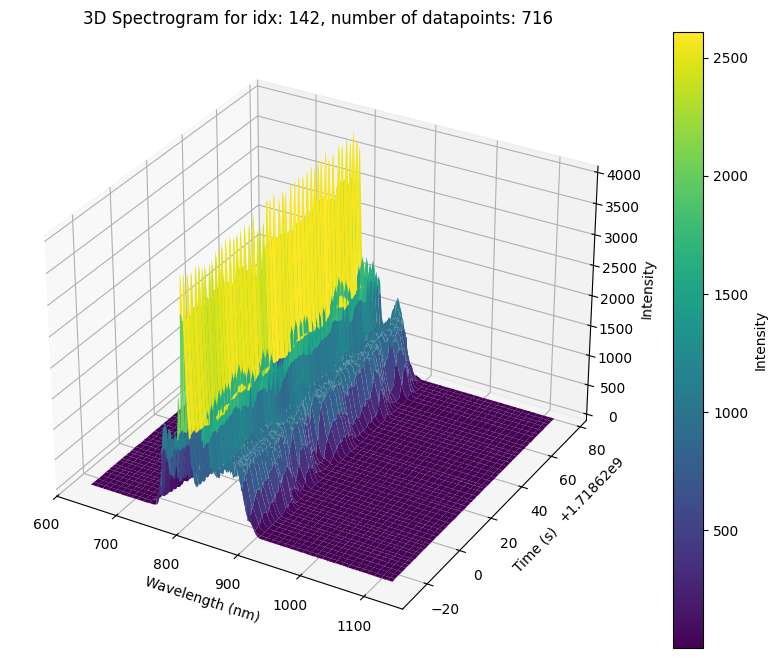

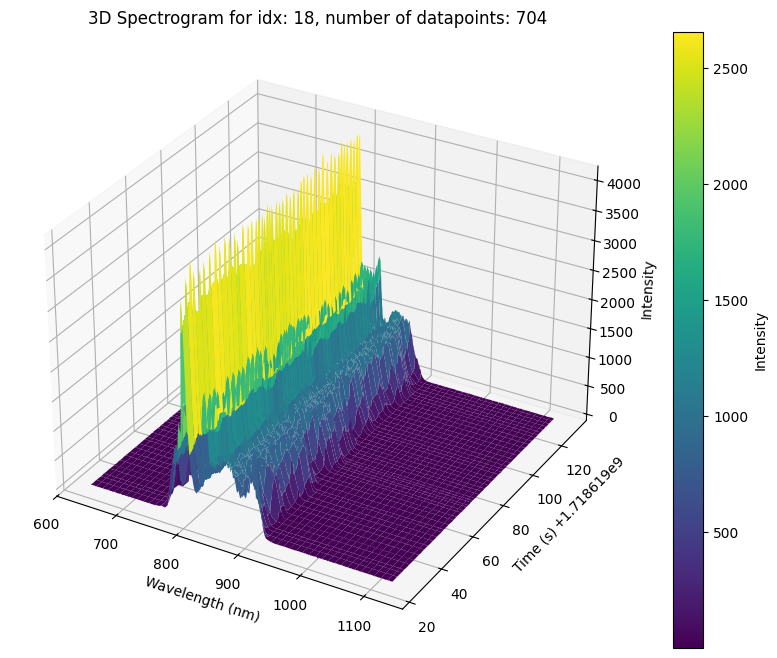

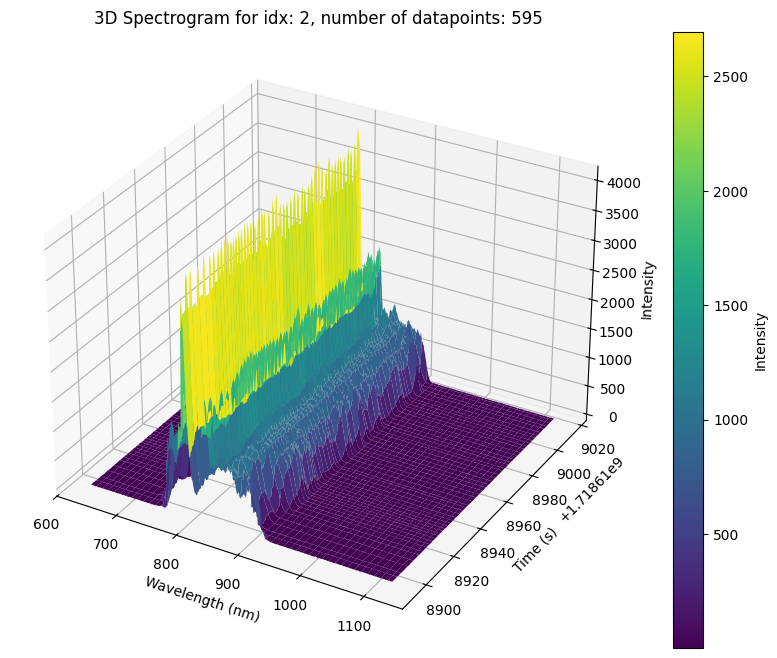

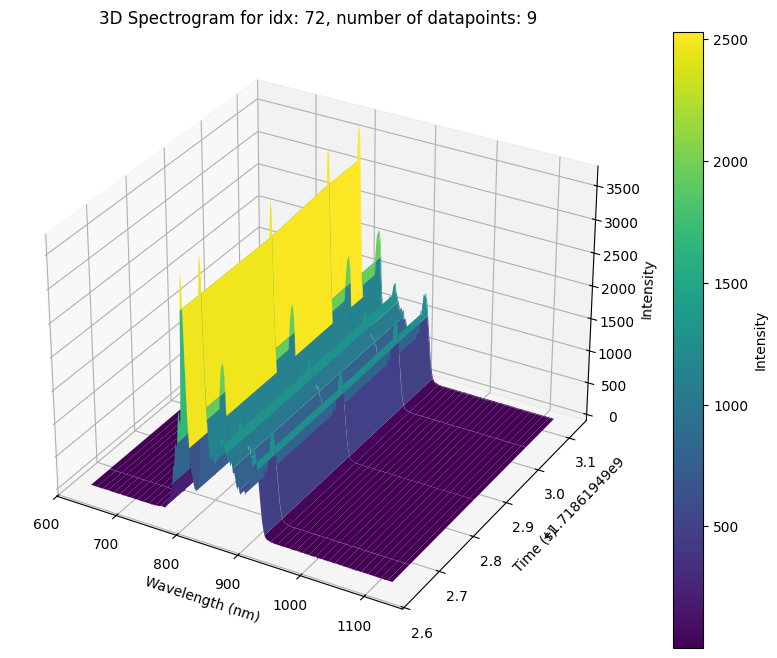

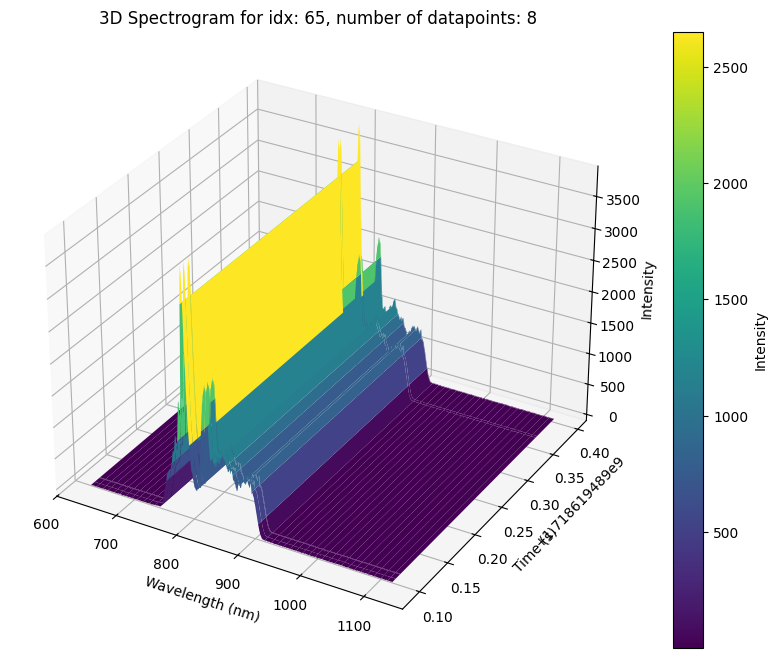

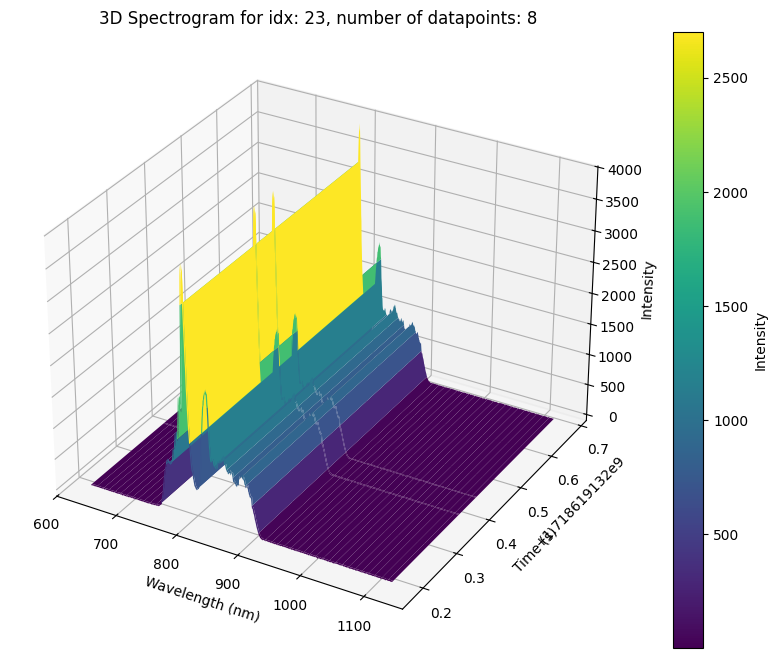

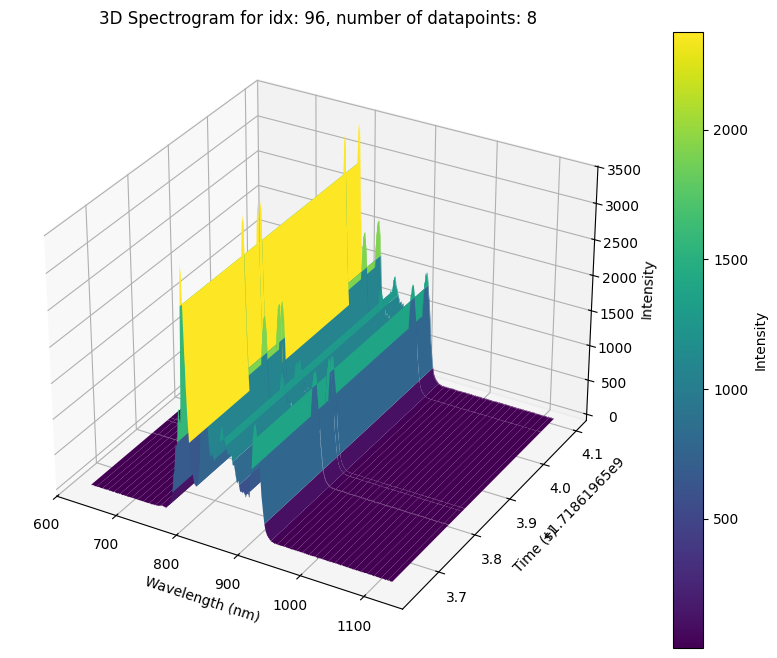

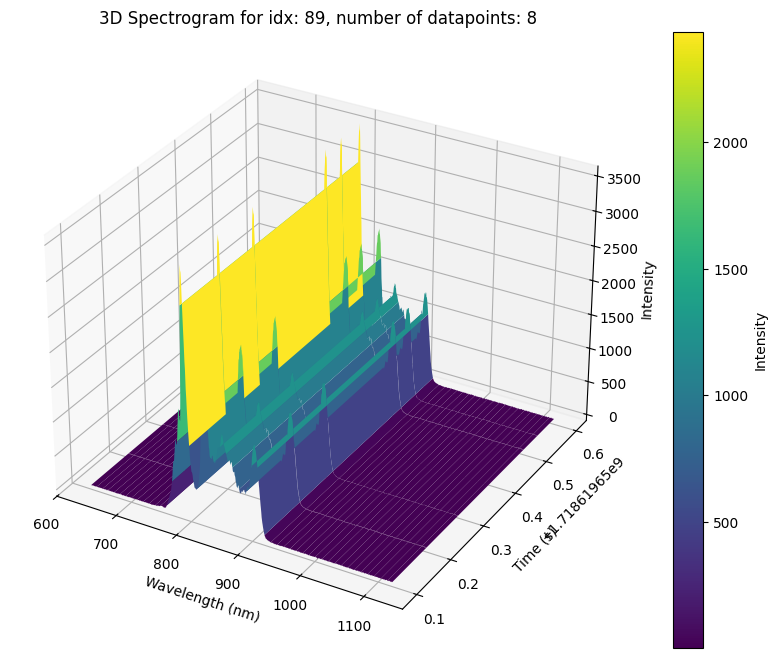

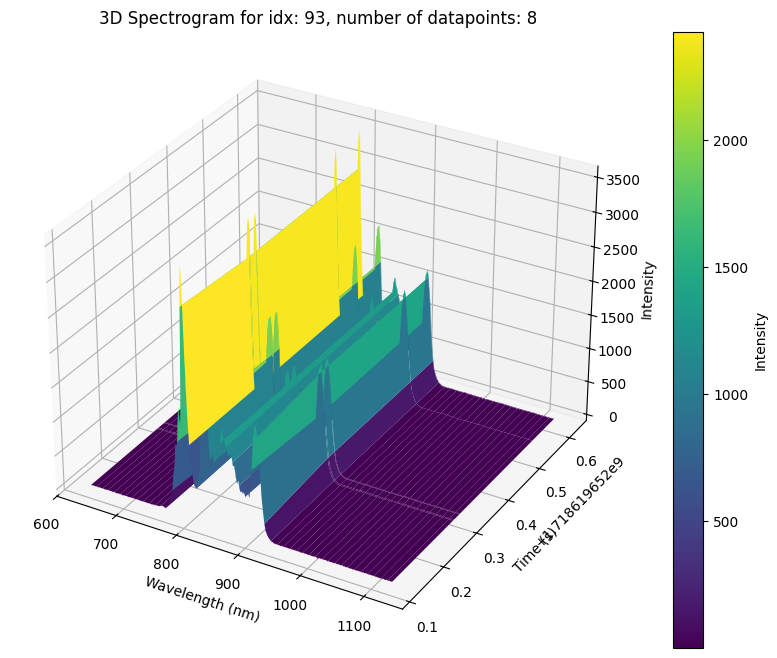

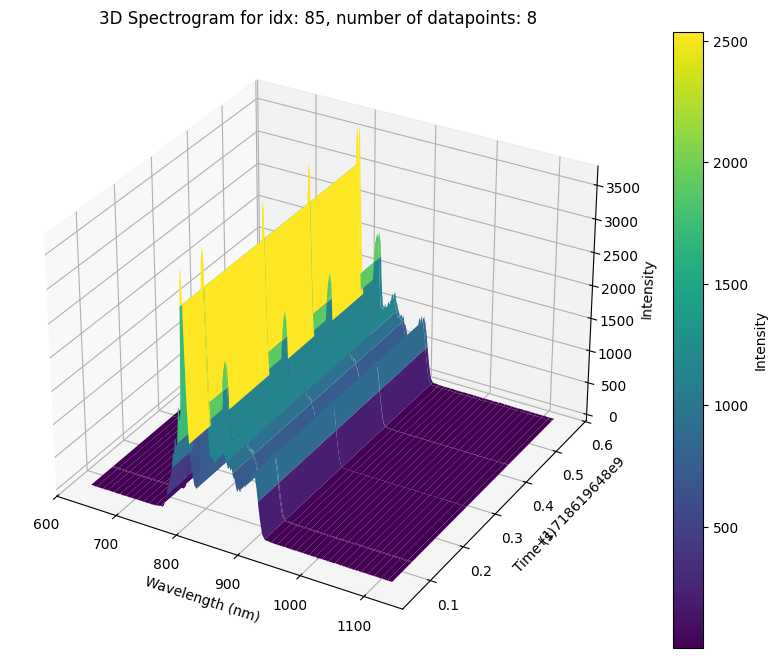

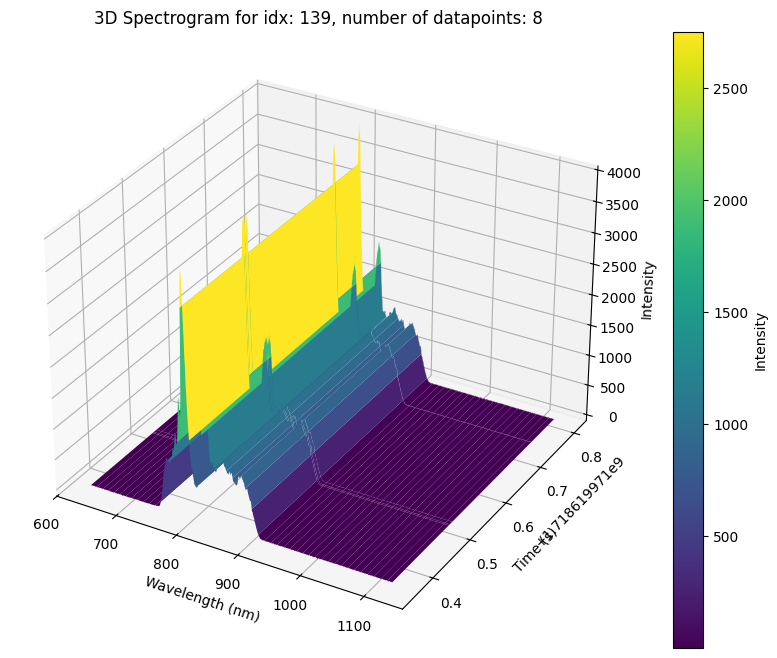

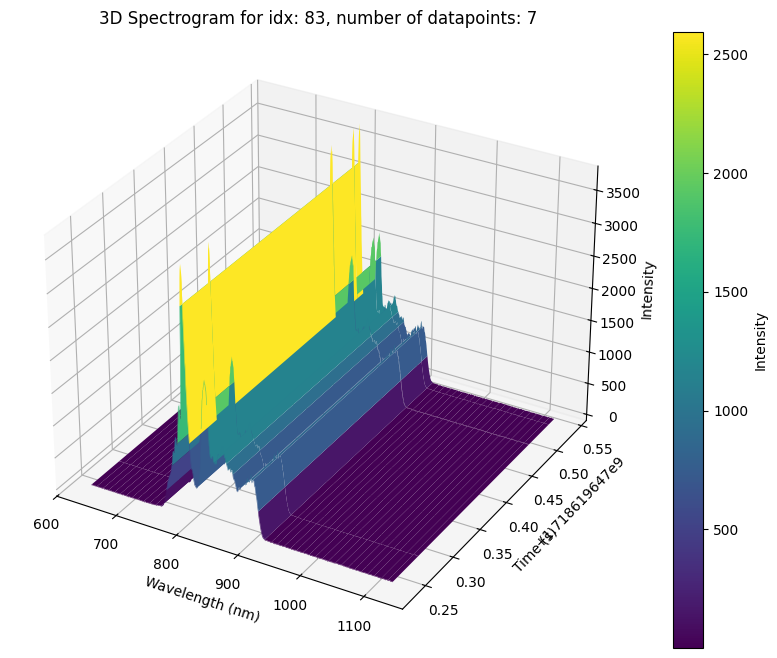

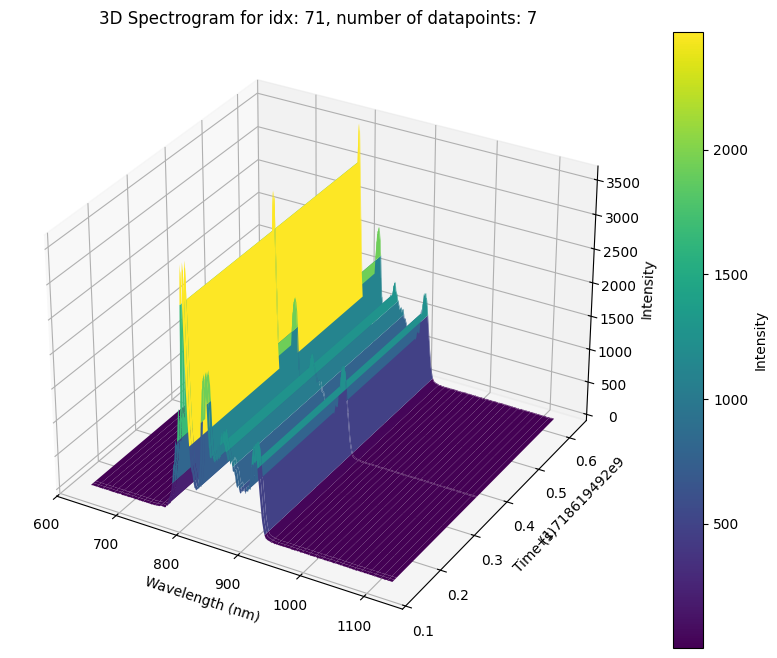

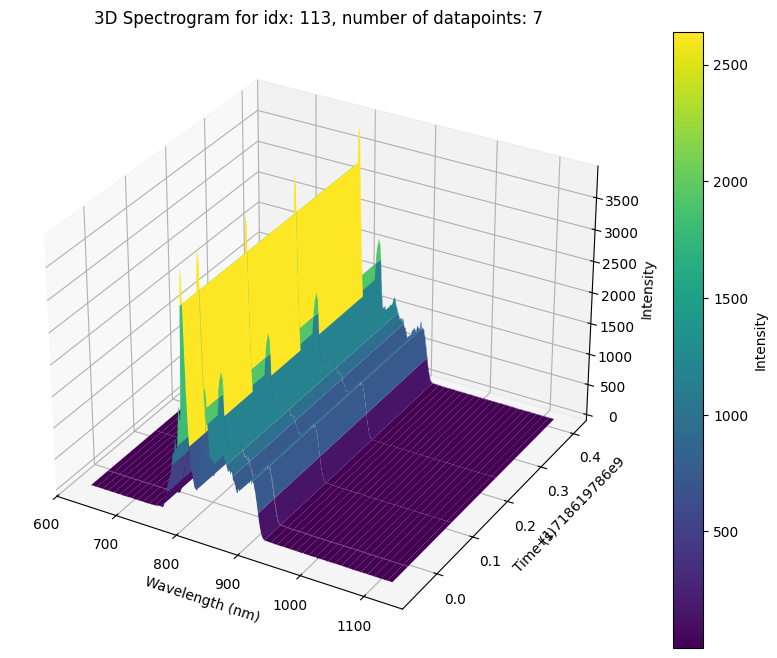

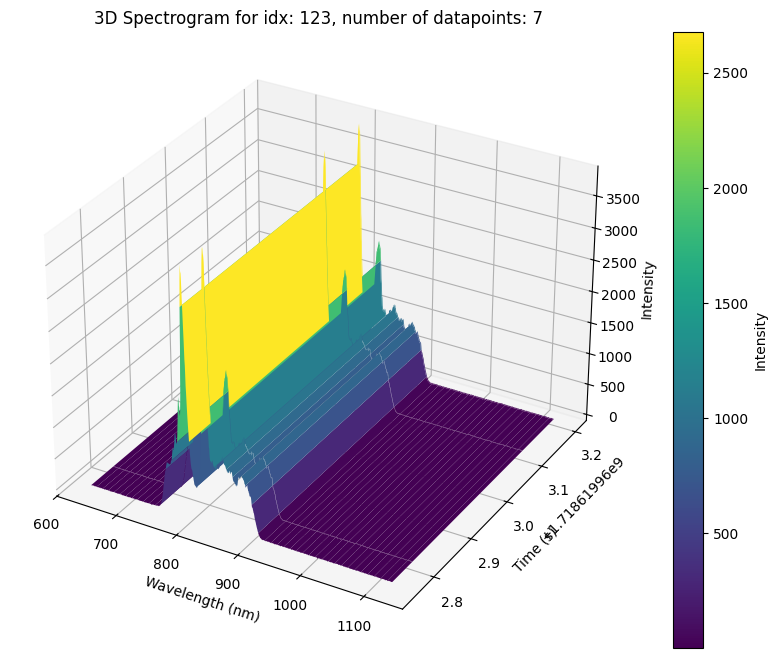

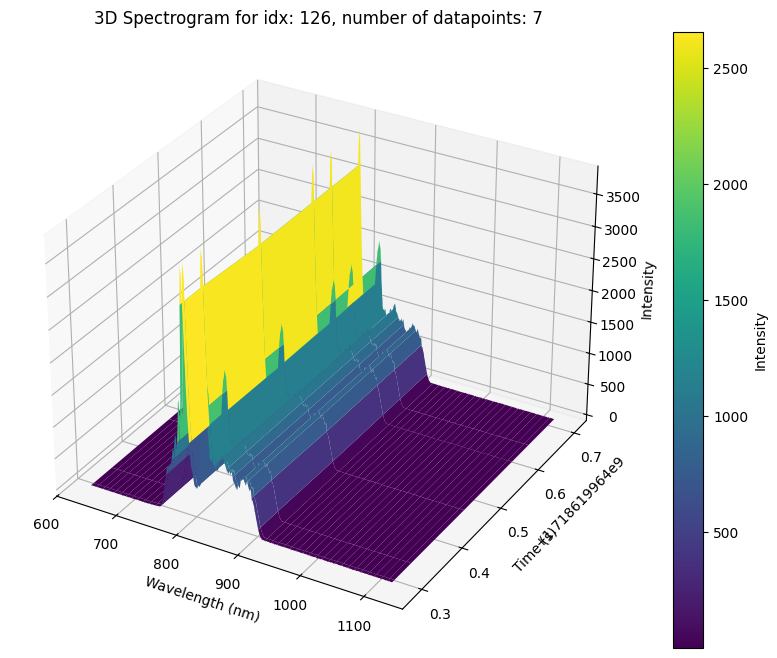

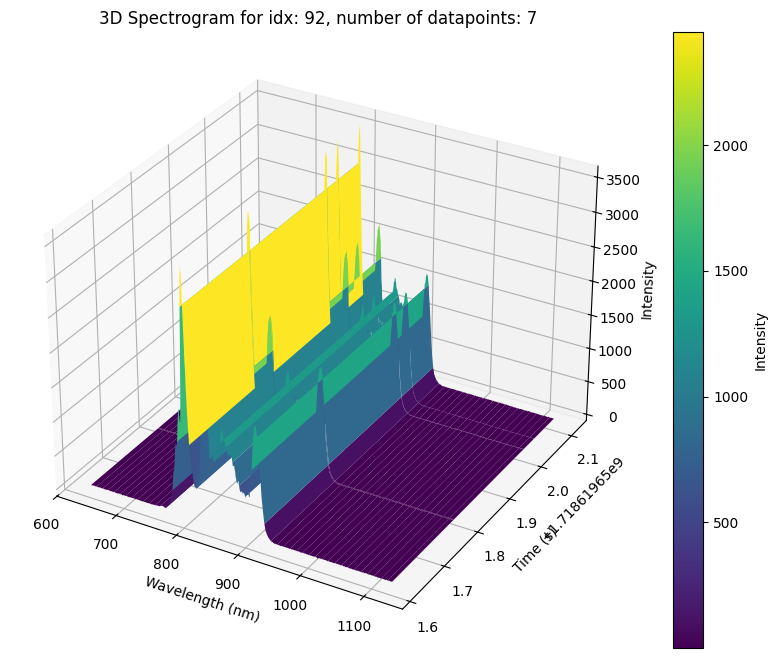

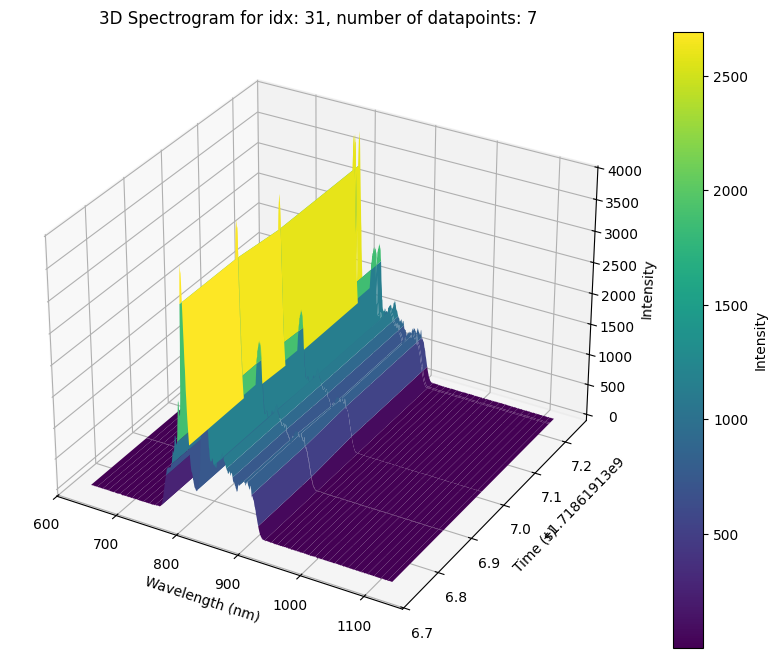

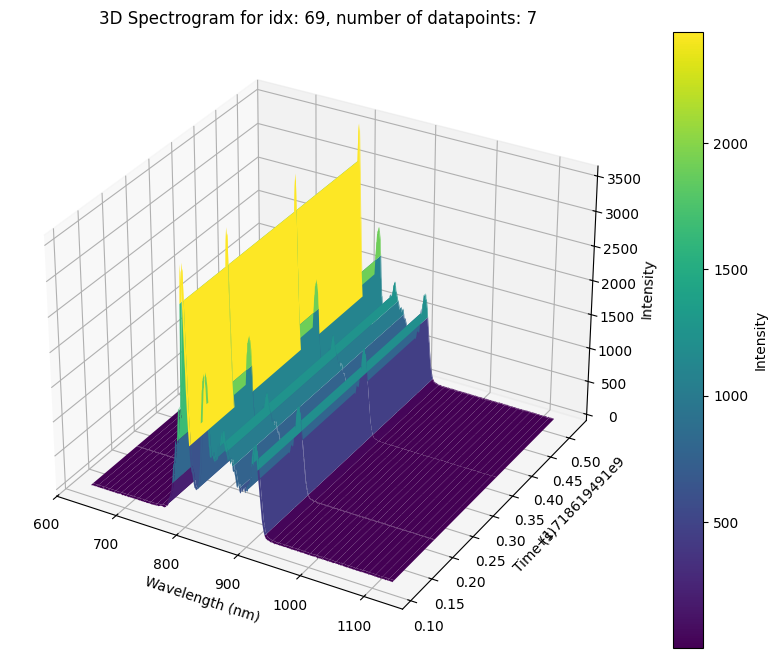

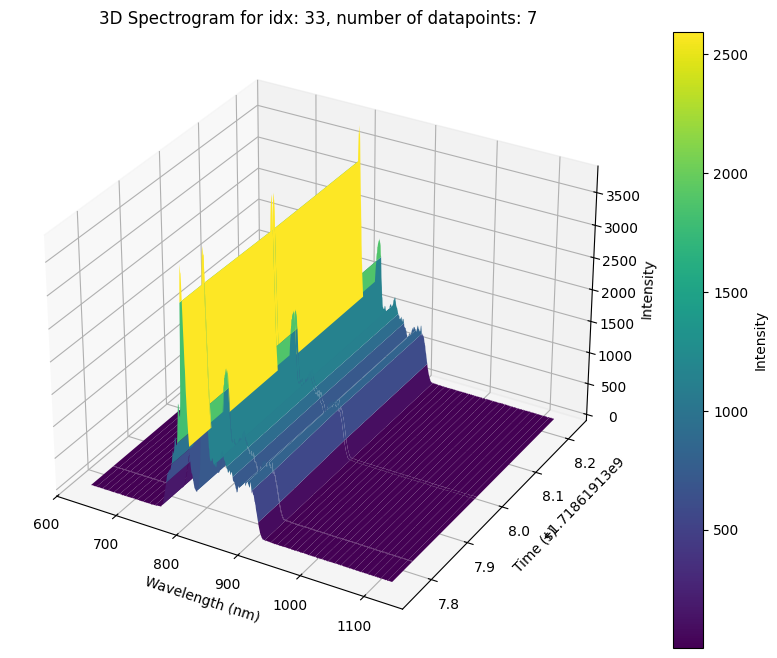

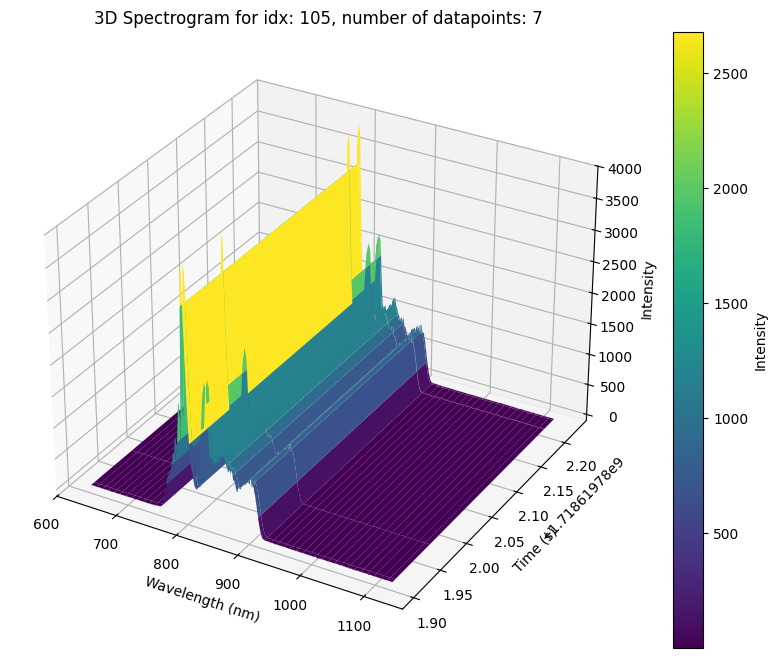

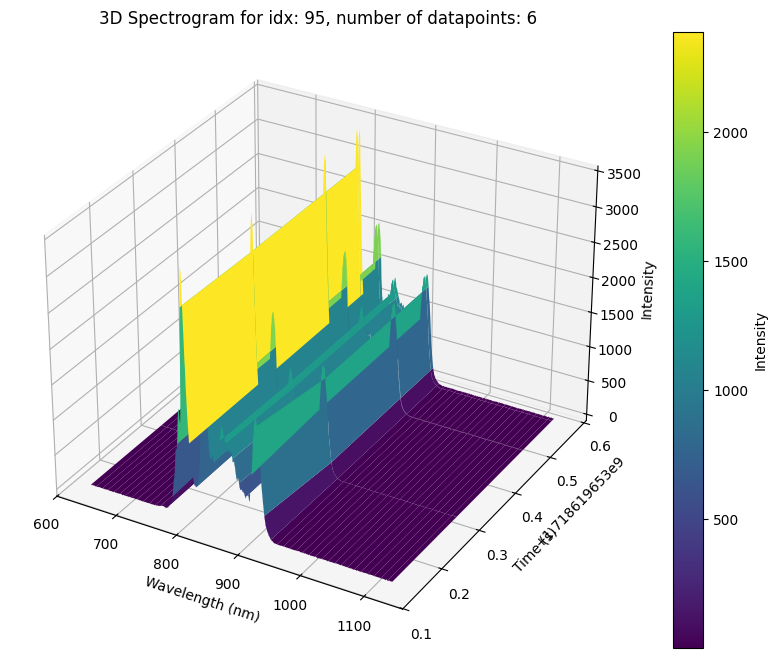

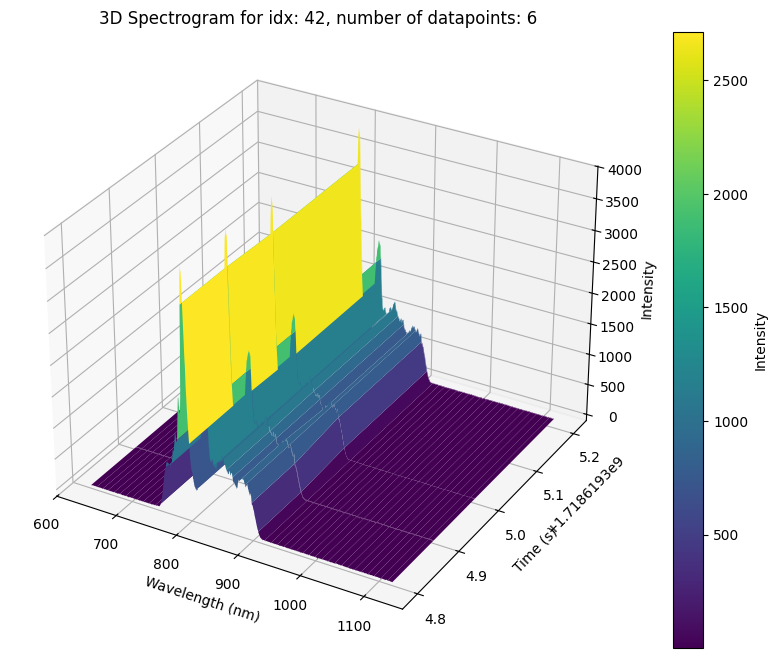

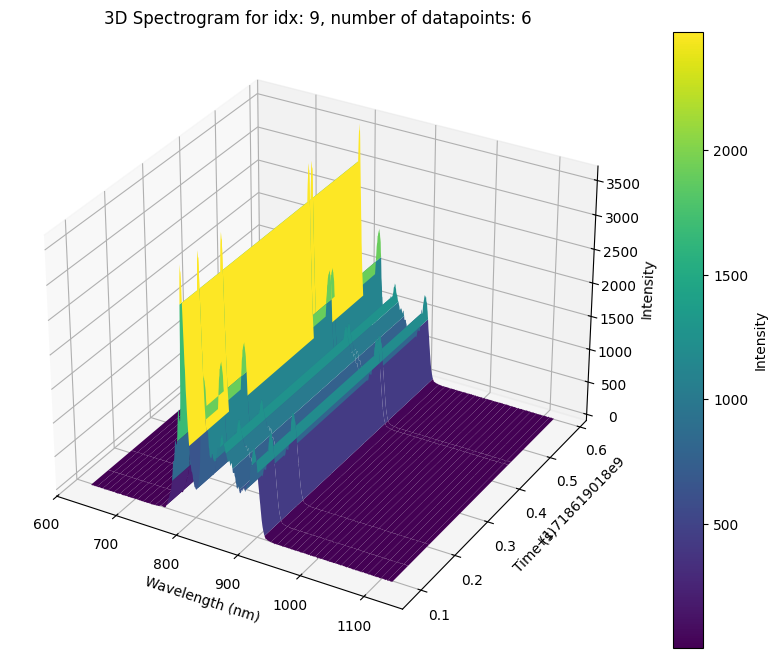

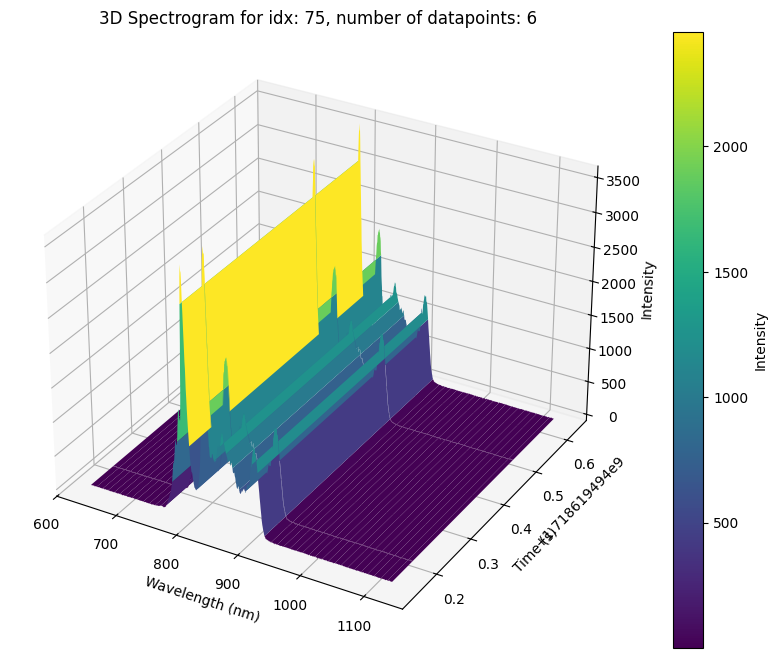

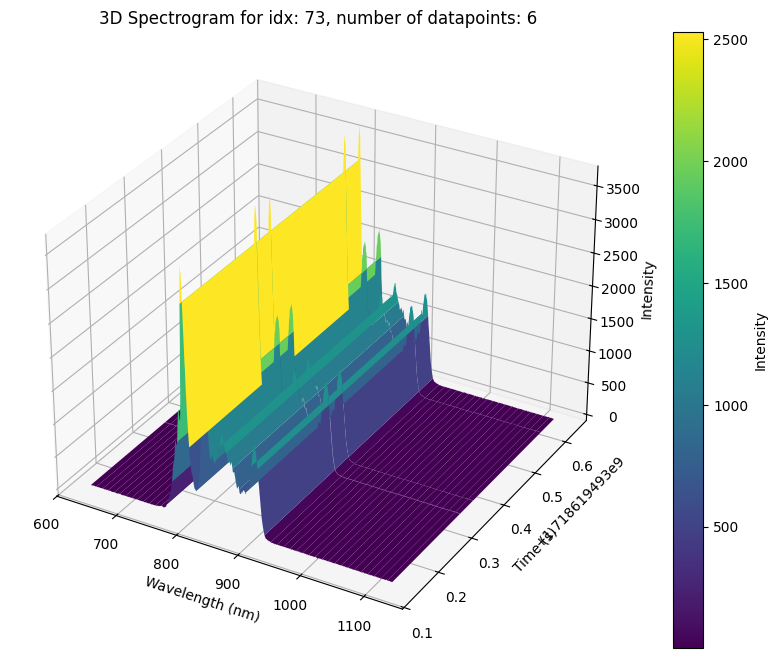

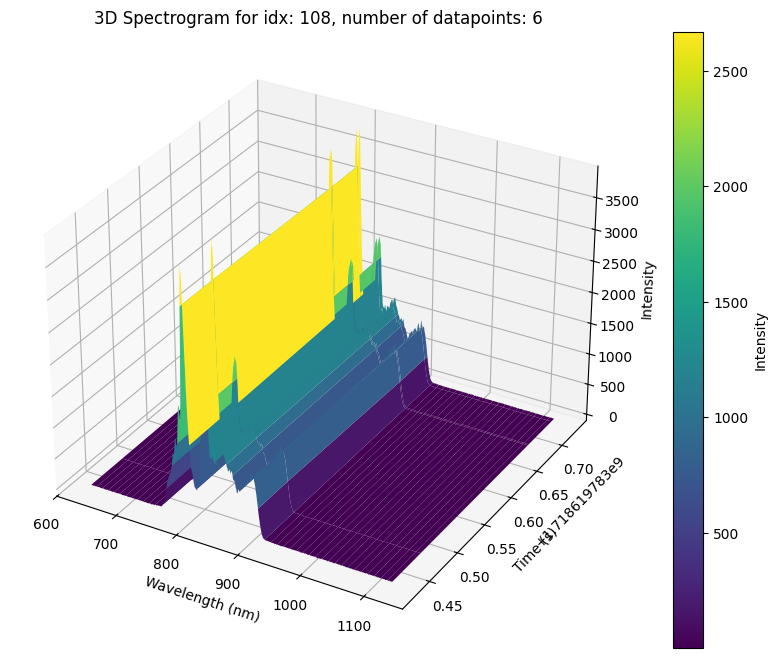

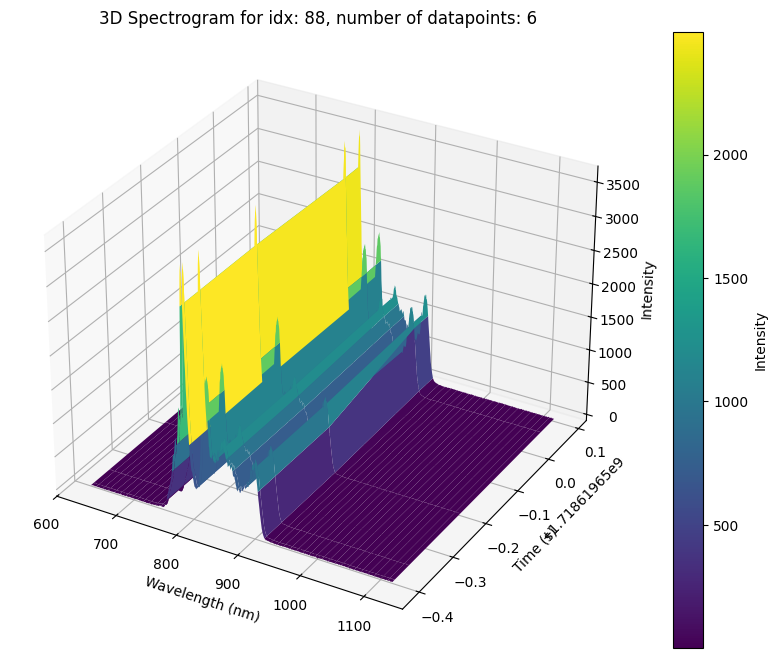

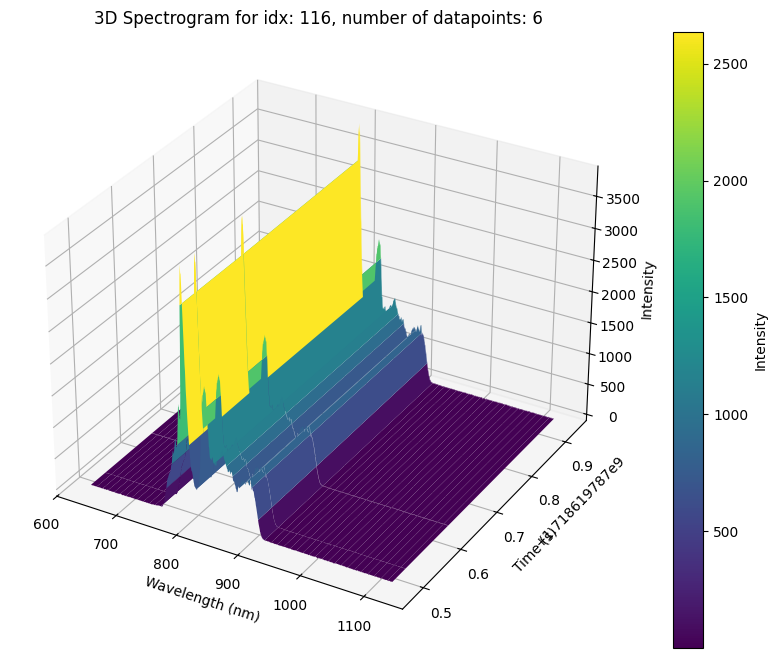

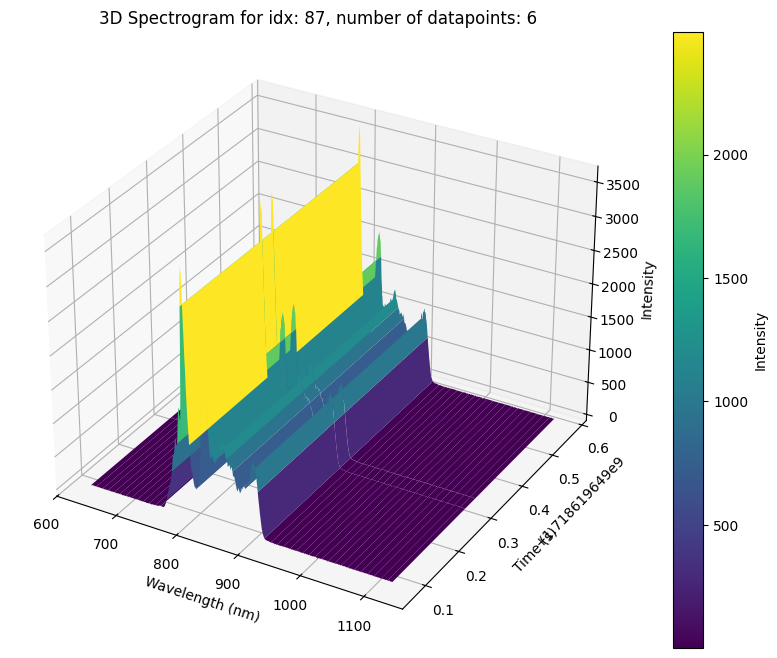

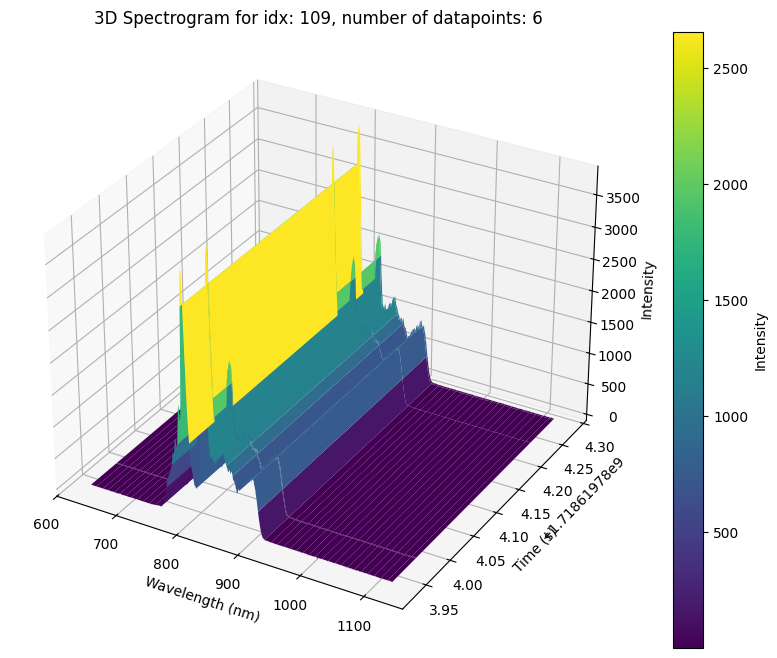

In [9]:
spec3d_freq_ind(data, 
              5,
              time_col='time', 
              wavelengths_col='Wavelengths',
              intensities_col = 'intensities'
             )

## Save dataset

In [11]:
data.to_csv('../data/constant_stepper_stg3_p2.csv', index=False)